# Explore here

In [2]:
#importo mis librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda


In [3]:
url= 'https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, sep=';', encoding='utf-8', quotechar='"')
target ='y'

##### bank-marketing-campaign-data

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##### Analisis previo

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
n_uniques = df.nunique()
n_uniques.reset_index()

,index,0
0,age,78
1,job,12
2,marital,4
3,education,8
4,default,3
5,housing,3
6,loan,3
7,contact,2
8,month,10
9,day_of_week,5


##### Duplicados
Revision y eliminacion de duplicados

In [8]:
df.duplicated().sum()

np.int64(12)

In [9]:
df.drop_duplicates(inplace= True)
df.shape

(41176, 21)

In [10]:
df.duplicated().sum()

np.int64(0)

##### Eleccion variables Relevantes

In [11]:
df = df.drop(columns=['duration', 'contact', 'day_of_week'])

In [12]:
df.head(10)

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Distribucion de datos univariable

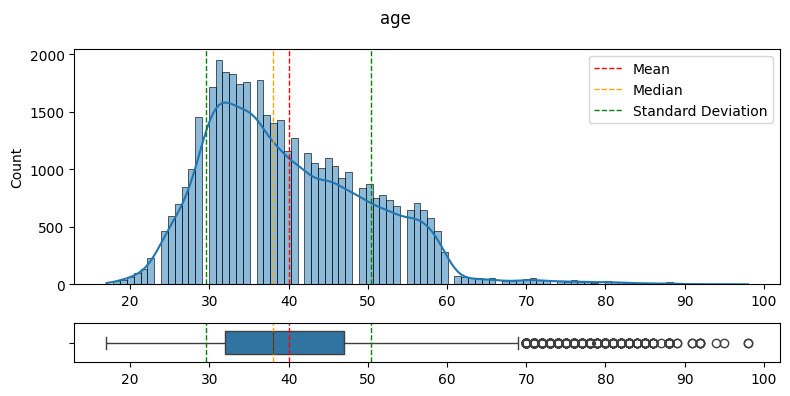

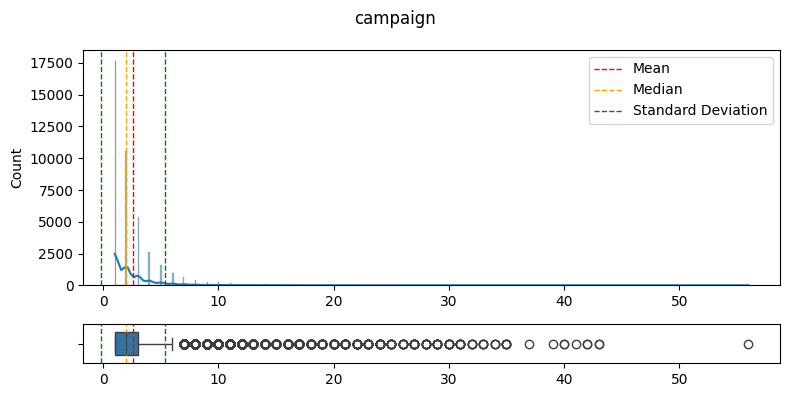

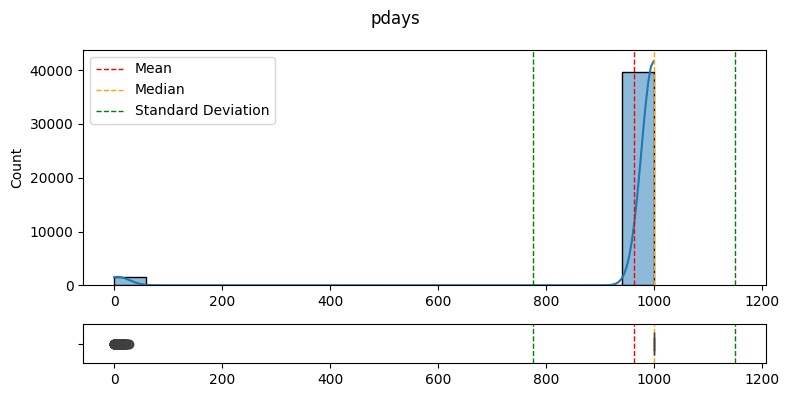

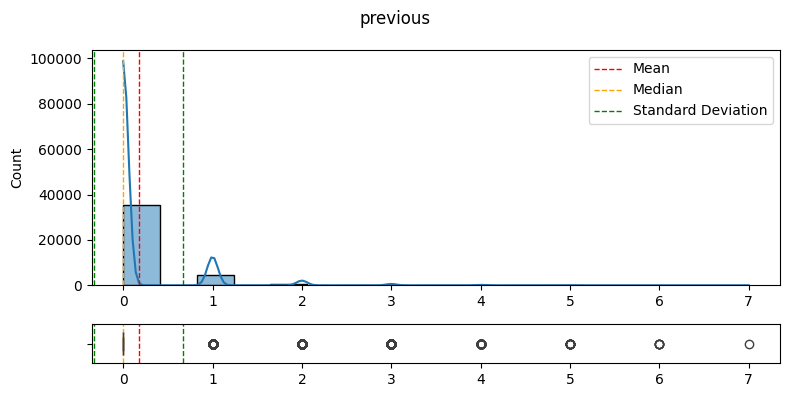

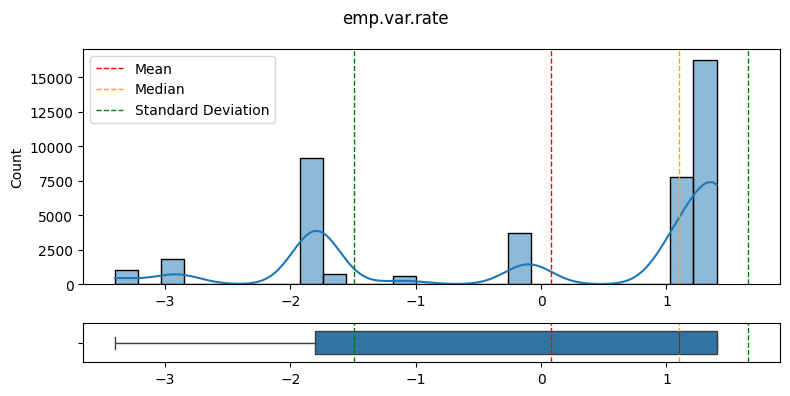

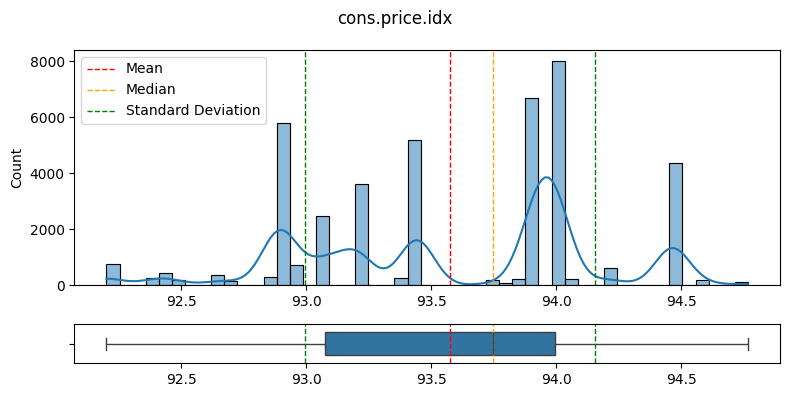

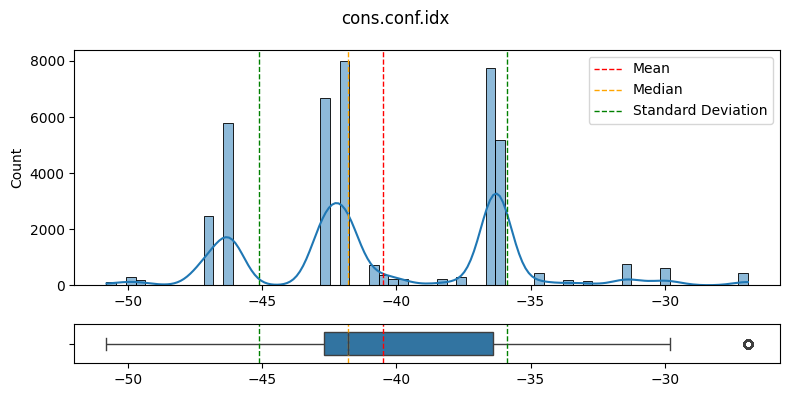

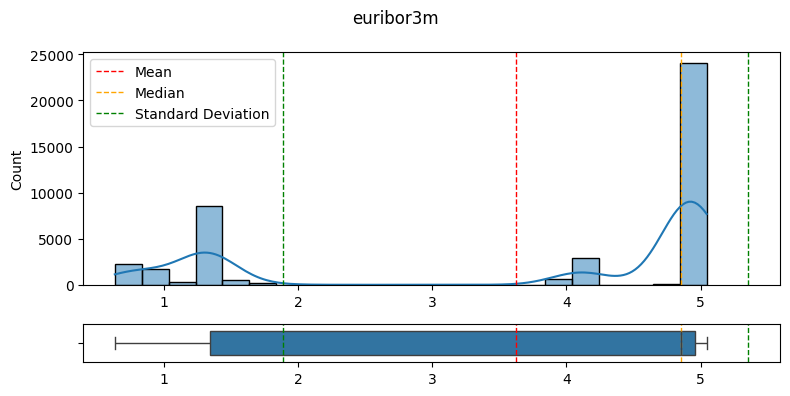

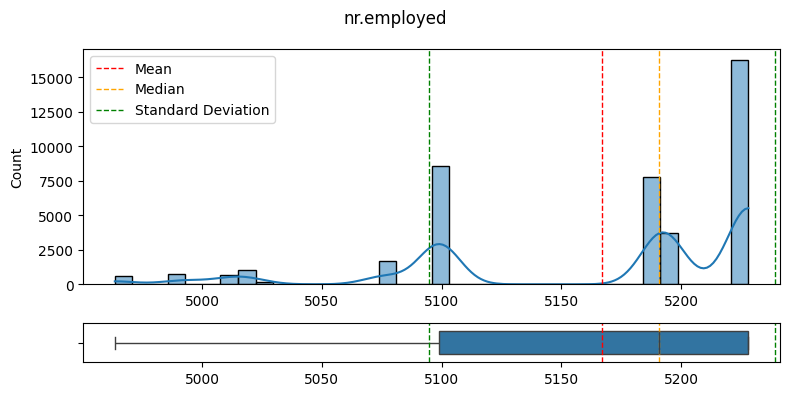

In [13]:
eda.plot_numerical_data(df)

`age` Observo que hay una media de edad de 30-50 años.

`campaing` Que la mayoria de los clientes han sido contactados pocas veces, aunque hay una cola muy larga.

`pdays` Todos casi en 999, yo lo veo que no habian sido contactados antes.

`previous` Hay una gran cantidad de contacto 0 previos
Las demas variables son valores economicos, que me indican distintos periodos economicos, hay una concentracion baja.

##### Analisis sobre Variables categoricas

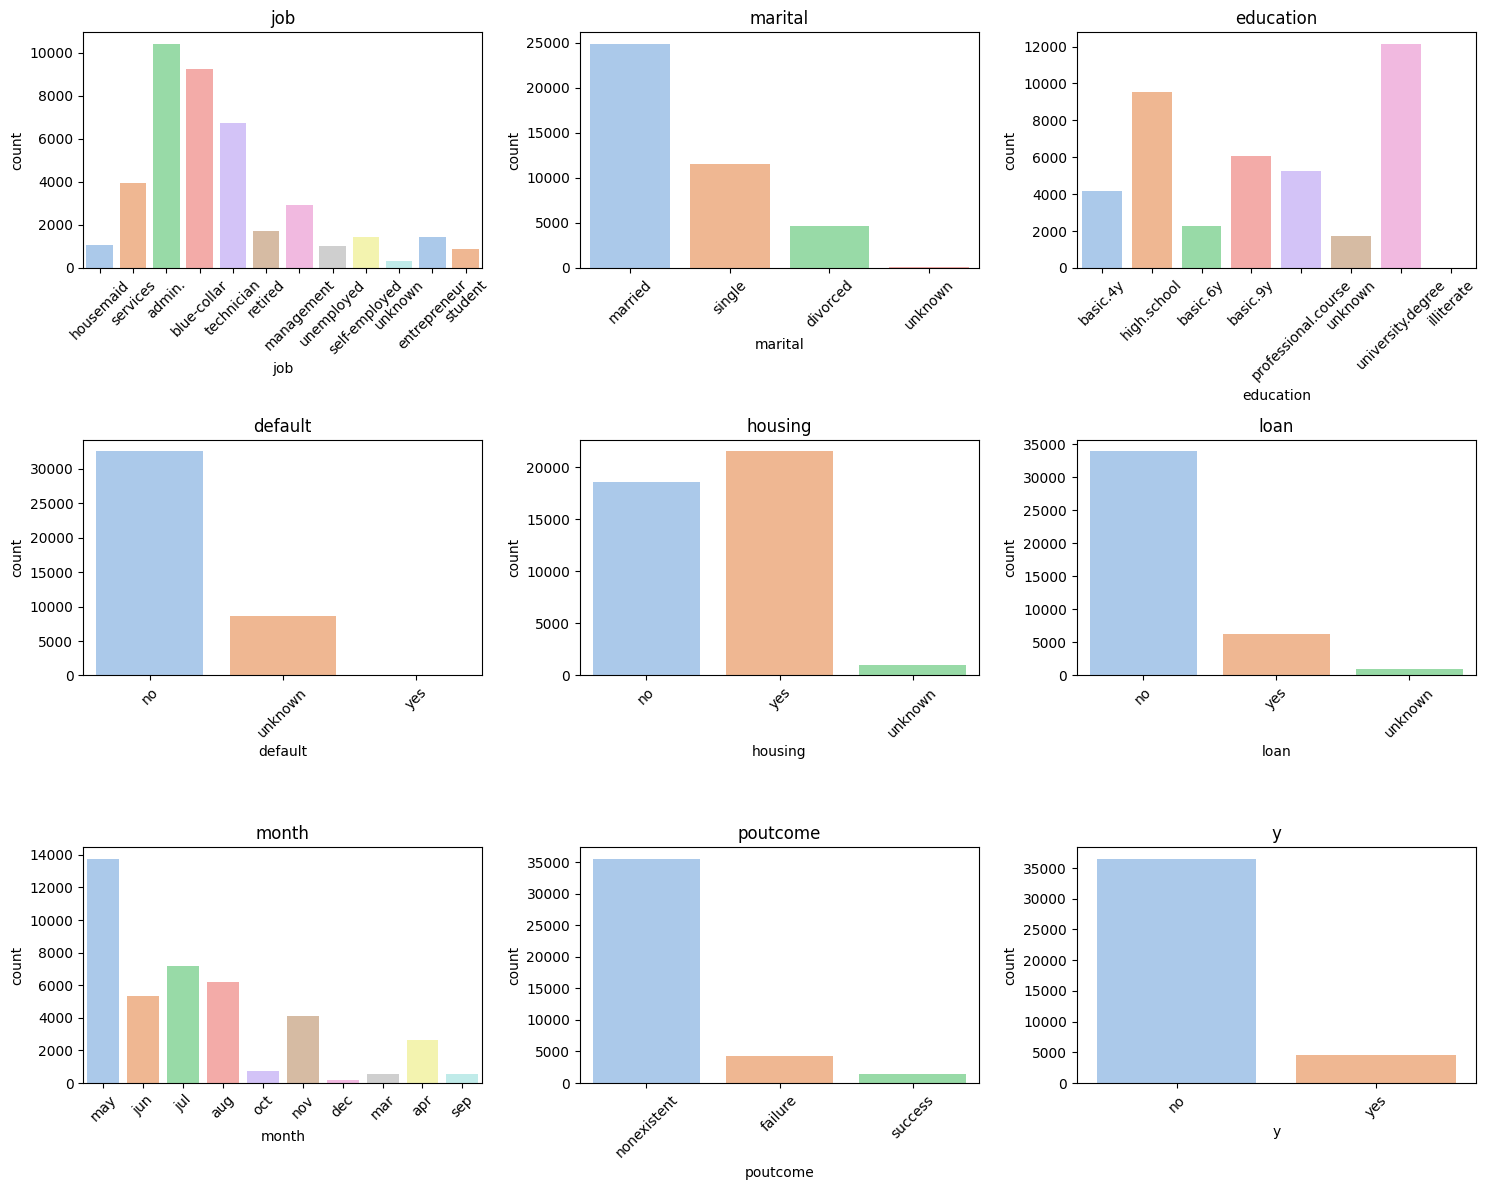

In [14]:
eda.plot_categorics_hist(df)

Noto que la variable `y` esta muy desbalanceada

In [15]:
#Calculo el porcentaje yes/no
prom= df['y'].value_counts(normalize=True)
print(f"Porcentaje de 'yes': {prom['yes']:.2%}")
print(f"Porcentaje de 'no': {prom['no']:.2%}")

Porcentaje de 'yes': 11.27%
Porcentaje de 'no': 88.73%


Hay una gran cantidad porcentual de "no" sobre "yes"

##### Cantidad de `job` aceptada

In [16]:
#Hago un porcentual y agrupado sobre 'yes' y 'no' de cada job
df.groupby('job')['y'].value_counts(normalize=True)

job            y  
admin.         no     0.870333
               yes    0.129667
blue-collar    no     0.931049
               yes    0.068951
entrepreneur   no     0.914835
               yes    0.085165
housemaid      no     0.900000
               yes    0.100000
management     no     0.887825
               yes    0.112175
retired        no     0.747381
               yes    0.252619
self-employed  no     0.895144
               yes    0.104856
services       no     0.918578
               yes    0.081422
student        no     0.685714
               yes    0.314286
technician     no     0.891675
               yes    0.108325
unemployed     no     0.857988
               yes    0.142012
unknown        no     0.887879
               yes    0.112121
Name: proportion, dtype: float64

In [17]:
df['y_bin'] = df['y'].map({'no': 0, 'yes': 1})

df.groupby('job')['y_bin'].mean().sort_values(ascending=False)

job
student          0.314286
retired          0.252619
unemployed       0.142012
admin.           0.129667
management       0.112175
unknown          0.112121
technician       0.108325
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081422
blue-collar      0.068951
Name: y_bin, dtype: float64

Hay una cantidad considerable en el grupo "blue-collar" no aceptada, es decir que es mas propenso a que a ese `job` sea negado.

##### Analisis multivariable
Variable vs (y)

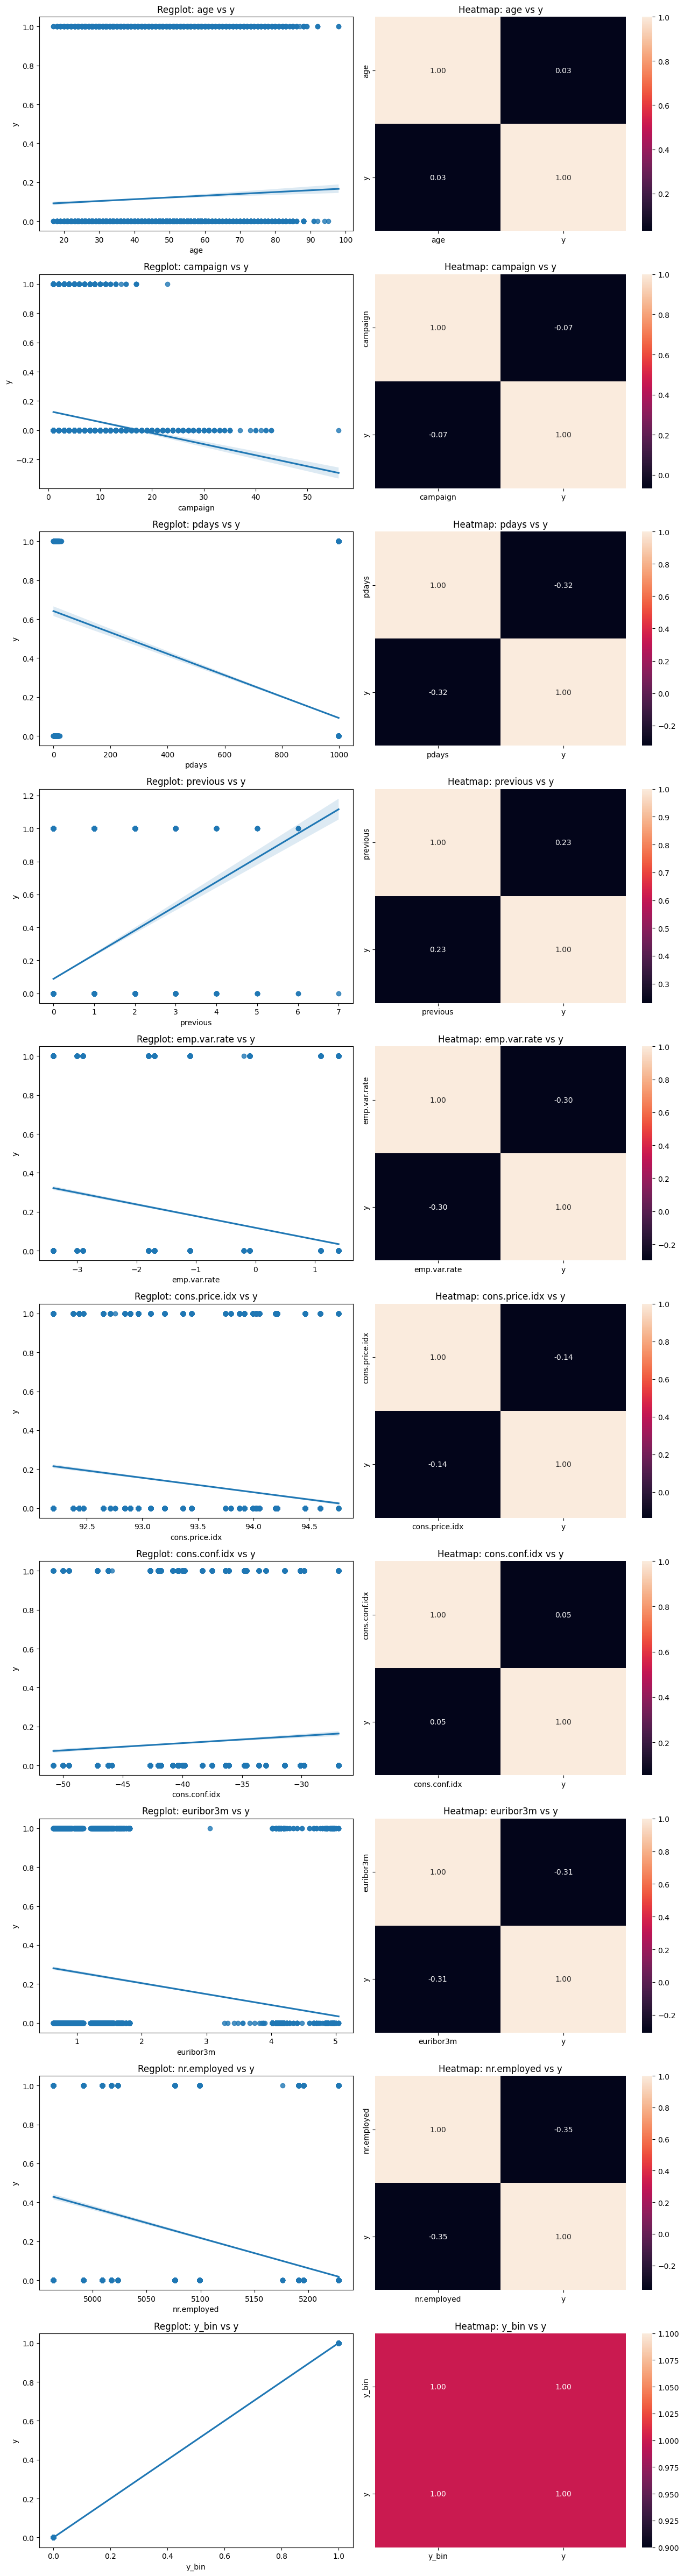

In [18]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
eda.plot_scatter_heatmaps(df,target)

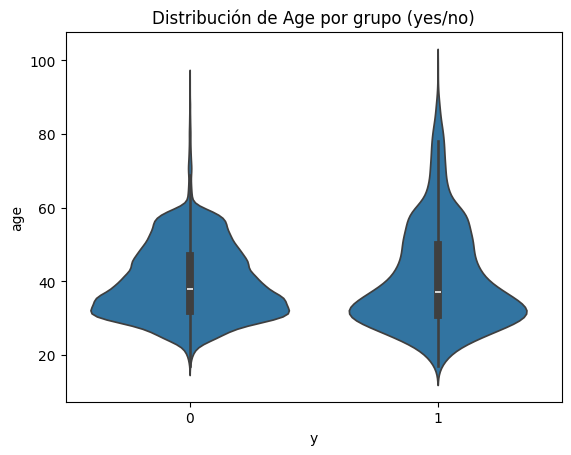

In [19]:
sns.violinplot(data=df, x="y", y="age")
plt.title("Distribución de Age por grupo (yes/no)")
plt.show()

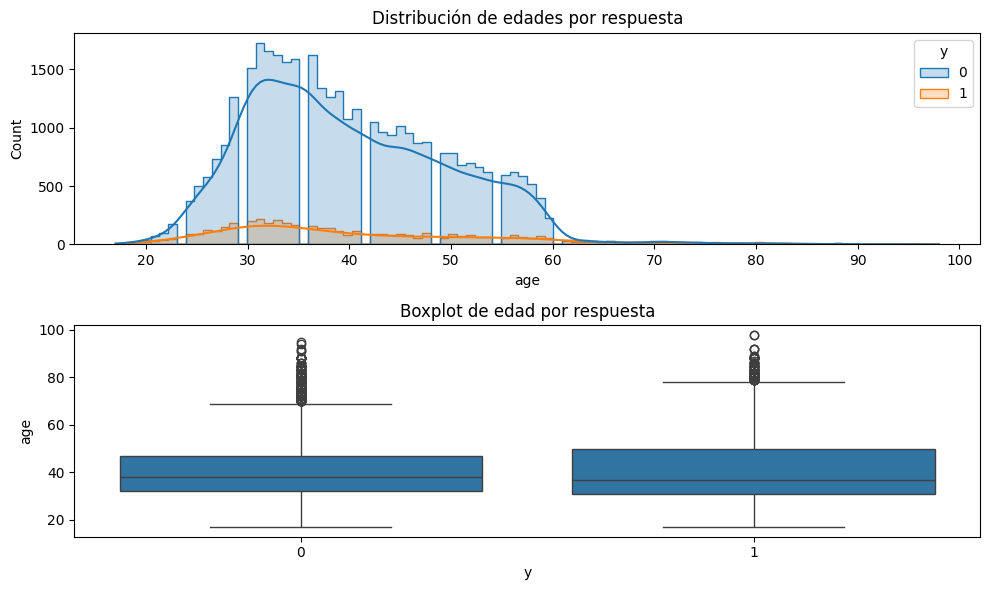

In [20]:
fig, axis = plt.subplots(2, 1, figsize=(10, 6))

#histograma por grupos
sns.histplot(ax=axis[0], data=df, x="age", hue="y", kde=True, element="step")
axis[0].set_title("Distribución de edades por respuesta")

#boxplot
sns.boxplot(ax=axis[1], data=df, x="y", y="age")
axis[1].set_title("Boxplot de edad por respuesta")

plt.tight_layout()
plt.show()

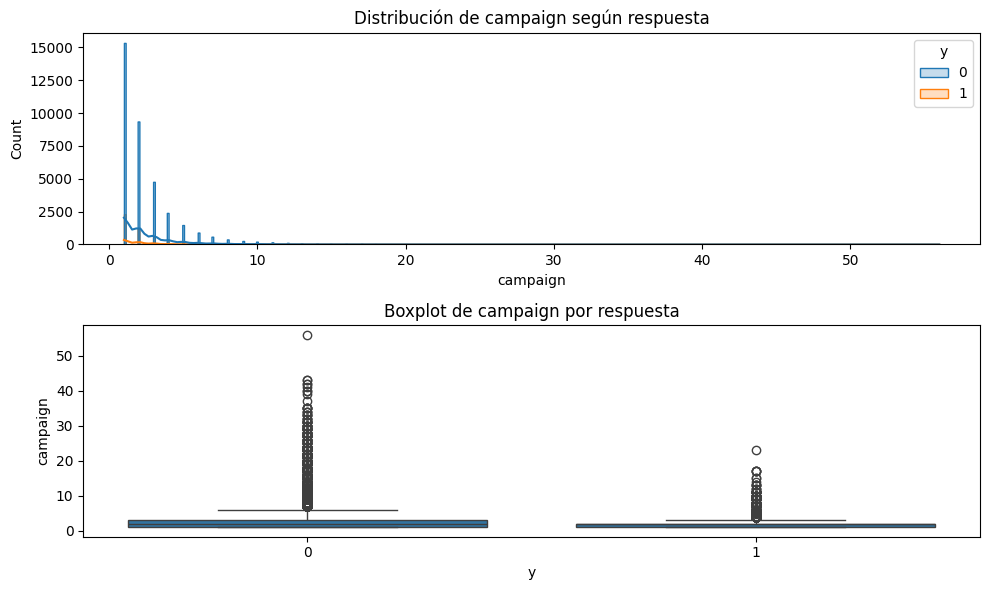

In [21]:
fig, axis = plt.subplots(2, 1, figsize=(10, 6))

# Histograma con KDE separado por yes/no
sns.histplot(data=df, x="campaign", hue="y", kde=True, element="step", ax=axis[0])
axis[0].set_title("Distribución de campaign según respuesta")

# Boxplot
sns.boxplot(data=df, x="y", y="campaign", ax=axis[1])
axis[1].set_title("Boxplot de campaign por respuesta")

plt.tight_layout()
plt.show()

Al parecer no descartaria algun outlier, ya que me puede servir para mi prediccion, no considero algun valor anormal.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

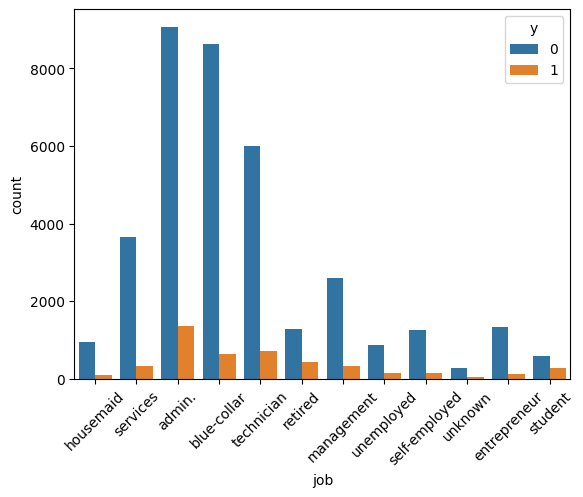

In [22]:
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)

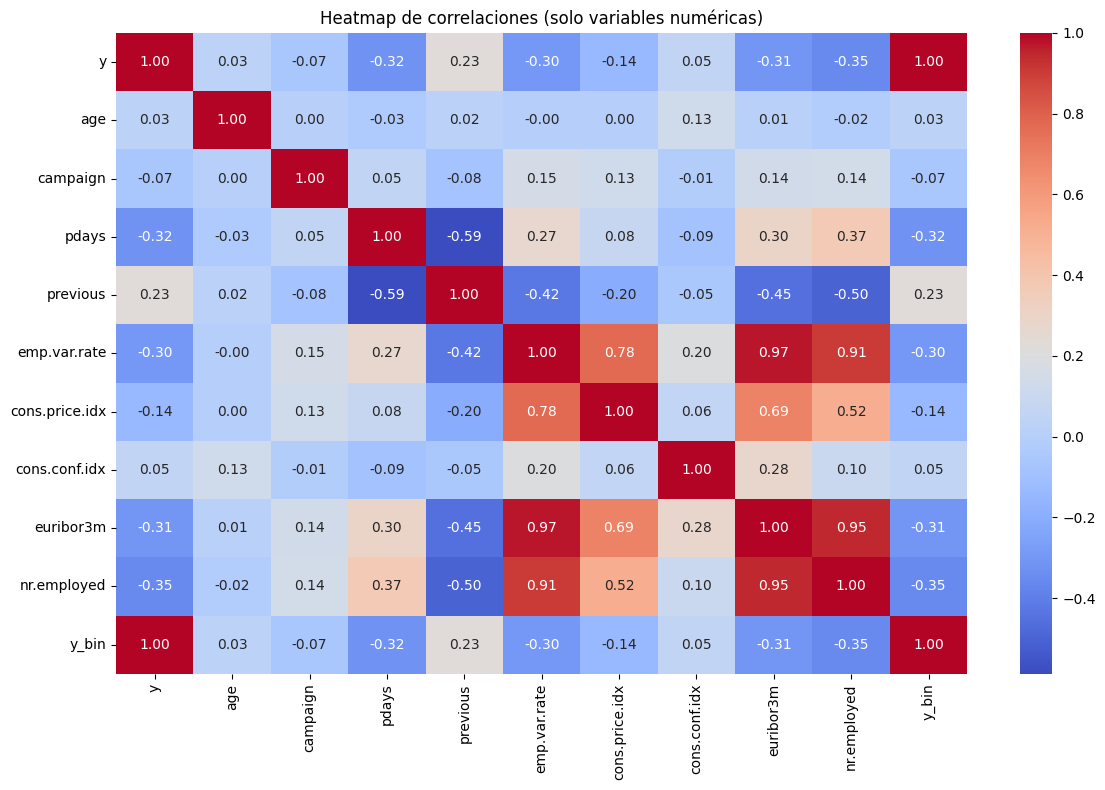

In [23]:
eda.general_heatmap(df, target)

Para el analisis de correlacion veo que se relacionan  `cons.price.idx` que seria el indice de confianza del consumidor, igual pasa con `previus` que es la variable con la que mas se relaciona con la target como se habia visto anteriormente.



En esta instancia de mi EDA consideraria que con droppear las columnas anteriores no tendria algun problema el hacer mi modelo de regresion, es decir que no tomaria algunos valores como outliers